In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC

In [20]:
df=pd.read_csv("C:\\Users\\mehul\\OneDrive\\Desktop\\important files\\RELIANCE.csv")
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527


In [21]:
fig=pgo.Figure(data=[pgo.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close'])])
fig.show()

In [22]:
import plotly.graph_objects as pgo

In [23]:
df.drop(['Date'],axis='columns')

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527


In [24]:
df['Close-Open']=df.Open-df.Close
df['High-Low']=df.High-df.Low
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
x = df[['Close-Open','High-Low']]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=14,test_size=0.2,train_size=0.8)

In [26]:
x_train

,Close-Open,High-Low
2385,70.05,81.35
3527,11.50,13.85
2995,-9.75,22.60
2177,56.80,65.00
1156,-3.65,9.45
...,...,...
4842,-2.10,18.85
3833,-8.45,13.30
2454,69.90,113.00
1292,-8.60,10.30


In [27]:
x_test

,Close-Open,High-Low
670,-7.30,9.95
1519,-113.60,147.30
1842,-8.25,26.50
3585,18.50,26.90
3204,6.75,12.65
...,...,...
199,-6.35,21.40
2850,5.20,15.00
3764,12.30,22.30
2072,63.85,103.20


In [28]:
classifier = SVC()

In [29]:
classifier.fit(x_train,y_train)

SVC()

In [30]:
y_test,y_train,x_test,x_train

(array([0, 1, 0, ..., 0, 1, 1]),
 array([0, 1, 1, ..., 0, 0, 0]),
       Close-Open  High-Low
 670        -7.30      9.95
 1519     -113.60    147.30
 1842       -8.25     26.50
 3585       18.50     26.90
 3204        6.75     12.65
 ...          ...       ...
 199        -6.35     21.40
 2850        5.20     15.00
 3764       12.30     22.30
 2072       63.85    103.20
 457         3.45      6.55
 
 [1062 rows x 2 columns],
       Close-Open  High-Low
 2385       70.05     81.35
 3527       11.50     13.85
 2995       -9.75     22.60
 2177       56.80     65.00
 1156       -3.65      9.45
 ...          ...       ...
 4842       -2.10     18.85
 3833       -8.45     13.30
 2454       69.90    113.00
 1292       -8.60     10.30
 2667       -7.30     16.70
 
 [4244 rows x 2 columns])

In [31]:
y_pred = classifier.predict(x_train)

In [32]:
y_pred_2 = classifier.predict(x_test)

In [33]:
y_pred_2

array([1, 0, 1, ..., 1, 1, 1])

In [34]:
len(y_pred),len(y_test)

(4244, 1062)

In [35]:
num_to_drop = 3182

In [36]:
indices_to_drop = np.random.choice(len(y_pred), num_to_drop,False)

In [37]:
y_pred= np.delete(y_pred, indices_to_drop)

In [38]:
len(y_pred)

1062

In [39]:
len(y_test)
y_test,y_pred

(array([0, 1, 0, ..., 0, 1, 1]), array([1, 1, 1, ..., 1, 1, 1]))

In [40]:
df['prediction'] = classifier.predict(x)
print(df['prediction'])

0       1
1       1
2       1
3       1
4       1
       ..
5301    1
5302    1
5303    1
5304    1
5305    1
Name: prediction, Length: 5306, dtype: int32


In [41]:
df.prediction == 0

0       False
1       False
2       False
3       False
4       False
        ...  
5301    False
5302    False
5303    False
5304    False
5305    False
Name: prediction, Length: 5306, dtype: bool

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.4990583804143126

In [43]:
bad=np.array(np.where(df["prediction"]==0))
bad

array([[ 954,  997, 1475, 1519, 1615, 1674, 1795, 1893, 1938, 1940, 1945,
        1953, 1955, 1956, 1957, 1959, 1963, 1967, 1975, 1997, 2003, 2010,
        2016, 2019, 2020, 2023, 2040, 2059, 2064, 2073, 2087, 2089, 2098,
        2101, 2110, 2123, 2127, 2131, 2136, 2143, 2146, 2148, 2153, 2174,
        2183, 2185, 2186, 2195, 2209, 2213, 2216, 2235, 2238, 2240, 2257,
        2261, 2272, 2305, 2307, 2315, 2318, 2335, 2340, 2343, 2355, 2359,
        2365, 2369, 2372, 2374, 2384, 2421, 2456, 4271, 4906, 5025, 5030,
        5033, 5040, 5084, 5089, 5114, 5121, 5148, 5184, 5186, 5254, 5268,
        5279]], dtype=int64)

In [44]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Close-Open,High-Low,prediction
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN,-14.20,14.20,1
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN,-13.45,20.55,1
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN,-25.85,31.25,1
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN,-5.35,11.70,1
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN,-19.55,24.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.00,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445,-17.85,50.50,1
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.20,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088,-48.65,58.95,1
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.00,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963,0.55,27.85,1
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.50,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527,-1.15,37.20,1


In [45]:
from sklearn import svm

In [46]:
clf = svm.SVC(kernel='linear',C=1)
clf.fit(x,y)

SVC(C=1, kernel='linear')

C:\Users\mehul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



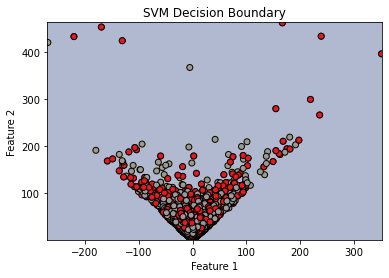

In [47]:
x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                     np.arange(y_min, y_max))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points and decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, alpha=0.8)

# Set the axis limits and labels
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Close')
plt.ylabel('Prev Close')

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
# Get the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the decision boundary
plt.plot(xx, yy, 'k-')
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
# Show the plot
plot = plt.show()
plot